In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('sensex1.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-05,20241.119141,20289.330078,20076.099609,20261.029297,20261.029297,9300.0
1,2014-02-06,20286.089844,20358.189453,20079.820313,20310.740234,20310.740234,12400.0
2,2014-02-07,20441.039063,20450.509766,20282.300781,20376.560547,20376.560547,11100.0
3,2014-02-10,20429.160156,20434.500000,20312.210938,20334.269531,20334.269531,7900.0
4,2014-02-11,20400.939453,20443.349609,20349.509766,20363.369141,20363.369141,9400.0


In [4]:
data = df.drop(['High', 'Open', 'Low', 'Volume', 'Adj Close'], axis = 1)

In [5]:
 df = data
df.tail()

,Date,Close
1226,2019-01-28,35656.699219
1227,2019-01-29,35592.500000
1228,2019-01-30,35591.250000
1229,2019-01-31,36256.691406
1230,2019-02-01,36469.429688


In [6]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [7]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [8]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [9]:
new_data[new_data==np.inf]=np.nan
new_data = new_data.dropna()
new_data.asfreq('D', method="pad")
new_data.head()

,Close
Date,
2014-02-05,20261
2014-02-06,20310.7
2014-02-07,20376.6
2014-02-10,20334.3
2014-02-11,20363.4


In [10]:
dataset = new_data.values

In [11]:
dataset.size

1222

In [12]:
train = dataset[:1000]
valid = dataset[1000:]

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


/home/umang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])


In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [17]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))


In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 51s - loss: 0.0021


In [19]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [20]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [21]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [22]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

501.79626291282693

/home/umang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/umang/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


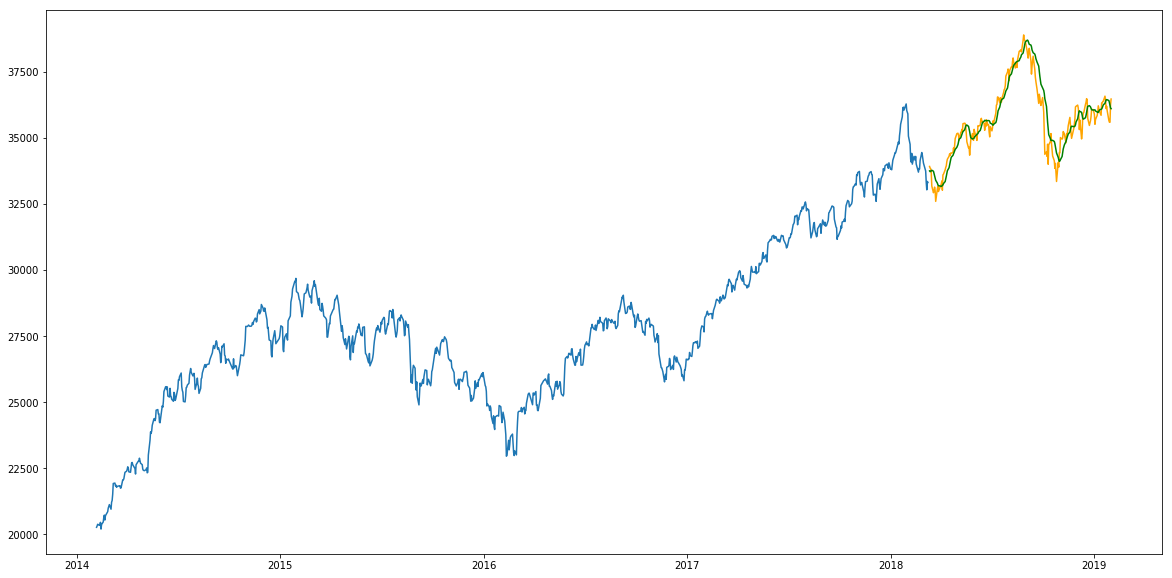

In [23]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
train = new_data[:1000]
valid = new_data[1000:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close']], color= 'orange')
plt.plot(valid[['Predictions']], color= 'green')

In [1]:
a = 500/36500
a


0.0136986301369863